# Linear models for regression

All linear models for regression learn a coefficient parameter ``coef_`` and an offset ``intercept_`` to make predictions using a linear combination of features:

```
y_pred = x_test[0] * coef_[0] + ... + x_test[n_features-1] * coef_[n_features-1] + intercept_
```

The difference between the linear models for regression is what kind of restrictions or penalties are put on ``coef_`` as regularization , in addition to fitting the training data well.
The most standard linear model is the 'ordinary least squares regression', often simply called 'linear regression'. It doesn't put any additional restrictions on ``coef_``, so when the number of features is large, it becomes ill-posed and the model overfits.

Let us generate a simple simulation, to see the behavior of these models.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y, true_coefficient = make_regression(n_samples=100, n_features=20, n_informative=10, noise=100, coef=True, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, train_size=70, test_size=30)
print(X_train.shape)

(70, 20)


In [11]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression().fit(X_train, y_train)
print("R^2 on training set: %f" % linear_regression.score(X_train, y_train))
print("R^2 on test set: %f" % linear_regression.score(X_test, y_test))

R^2 on training set: 0.842777
R^2 on test set: 0.441102


In [12]:
from sklearn.metrics import r2_score
print(r2_score(np.dot(X, true_coefficient), y))

0.6881636840998712


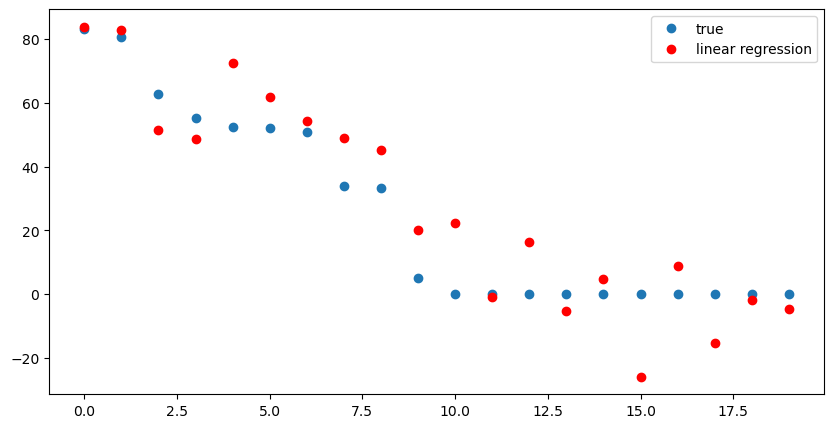

In [42]:
plt.figure(figsize=(10, 5))
coefficient_sorting = np.argsort(true_coefficient)[::-1]
plt.plot(true_coefficient[coefficient_sorting], "o", label="true")
plt.plot(linear_regression.coef_[coefficient_sorting], "ro", label="linear regression")

plt.legend();

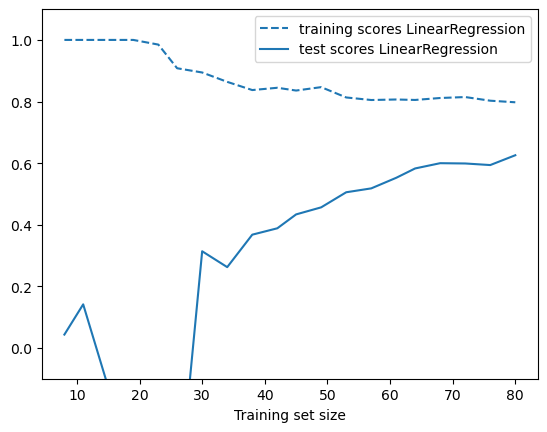

In [17]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes=np.linspace(.1, 1, 20))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--', label="training scores " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label="test scores " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.legend(loc='best')
    plt.ylim(-0.1, 1.1)

plt.figure()    
plot_learning_curve(LinearRegression(), X, y)

# Regularizations:

### Ridge Regression (L2 penalty)

**The Ridge estimator** is a simple regularization (called l2 penalty) of the ordinary LinearRegression. In particular, it has the benefit of being not computationally more expensive than the ordinary least square estimate.

$$ \text{min}_{w,b}  \sum_i || w^\mathsf{T}x_i + b  - y_i||^2  + \alpha ||w||_2^2$$ 

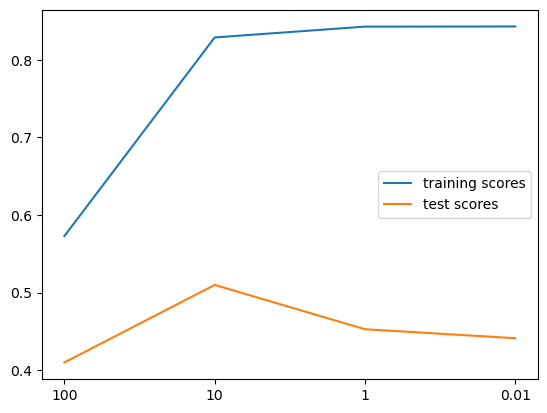

In [25]:
from sklearn.linear_model import Ridge
ridge_models = {}
training_scores = []
test_scores = []

for alpha in [100, 10, 1, .01]:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    training_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))
    ridge_models[alpha] = ridge

plt.figure()
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(4), [100, 10, 1, .01])
plt.legend(loc="best");

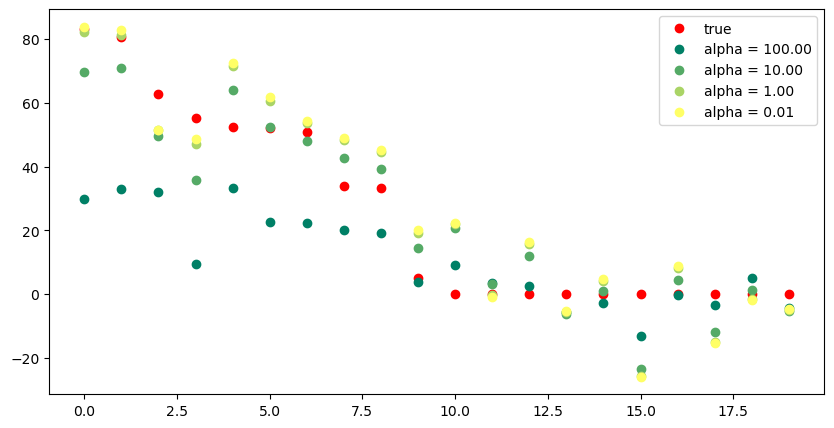

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(true_coefficient[coefficient_sorting], "o", label="true", c='r')

for i, alpha in enumerate([100, 10, 1, .01]):
    plt.plot(ridge_models[alpha].coef_[coefficient_sorting], "o", label="alpha = %.2f" % alpha, c=plt.cm.summer(i / 3.))
    
plt.legend(loc="best");

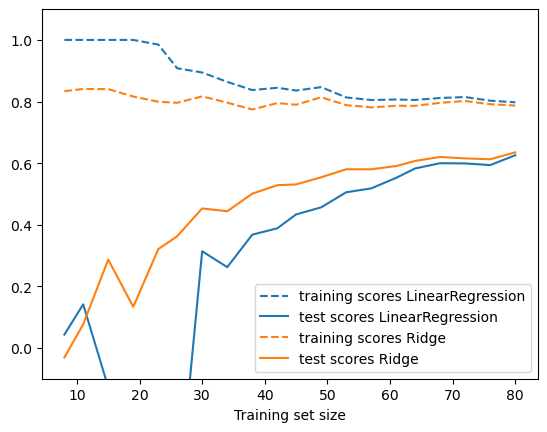

In [30]:
plt.figure()
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=10), X, y)

### Lasso (L1 penalty)
**The Lasso estimator** is useful to impose sparsity on the coefficient. In other words, it is to be prefered if we believe that many of the features are not relevant. This is done via the so-called l1 penalty.

$$ \text{min}_{w, b} \sum_i \frac{1}{2} || w^\mathsf{T}x_i + b  - y_i||^2  + \alpha ||w||_1$$ 

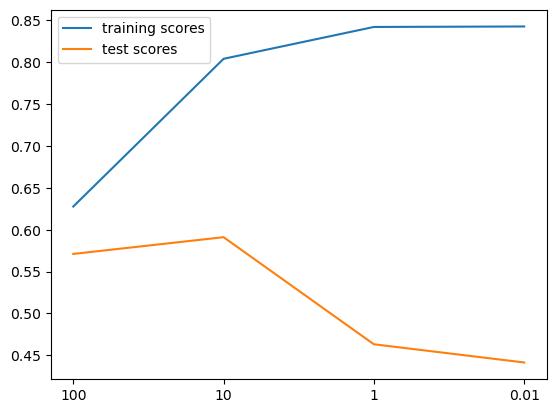

In [36]:
from sklearn.linear_model import Lasso

lasso_models = {}
training_scores = []
test_scores = []

for alpha in [30, 10, 1, .01]:
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    training_scores.append(lasso.score(X_train, y_train))
    test_scores.append(lasso.score(X_test, y_test))
    lasso_models[alpha] = lasso
plt.figure()
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(4), [100, 10, 1, .01])
plt.legend(loc="best");

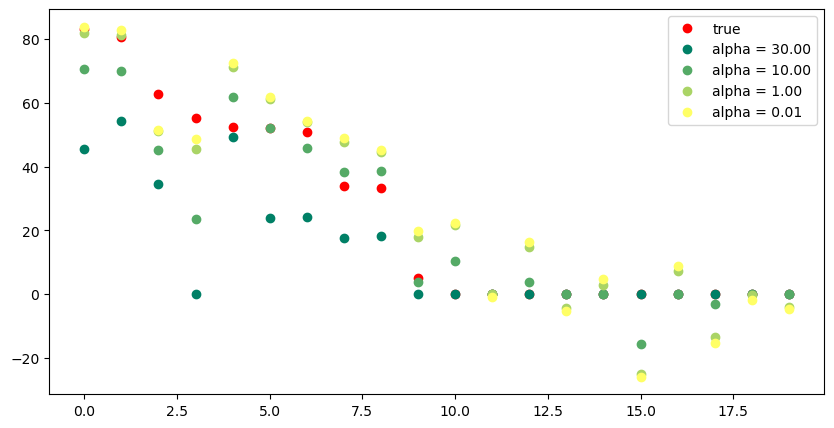

In [41]:
plt.figure(figsize=(10, 5))
plt.plot(true_coefficient[coefficient_sorting], "o", label="true", c='r')

for i, alpha in enumerate([30, 10, 1, .01]):
    plt.plot(lasso_models[alpha].coef_[coefficient_sorting], "o", label="alpha = %.2f" % alpha, c=plt.cm.summer(i / 3.))
    
plt.legend(loc="best");

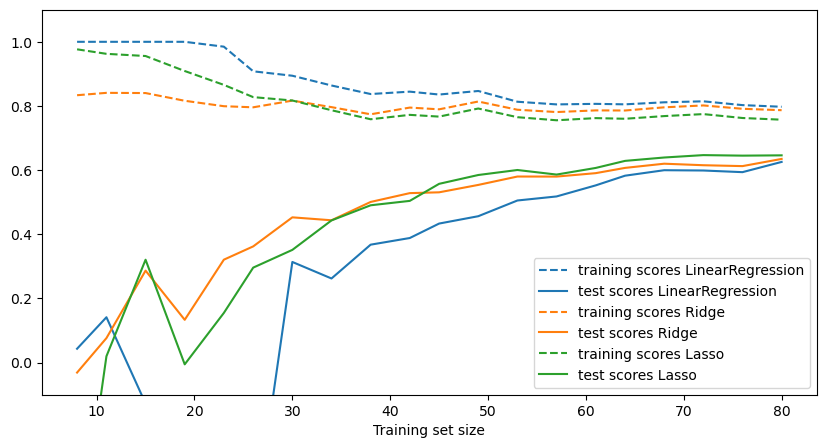

In [39]:
plt.figure(figsize=(10, 5))
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=10), X, y)
plot_learning_curve(Lasso(alpha=10), X, y)

### ElasticNet
Instead of picking Ridge *or* Lasso, you can also use [ElasticNet](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html), which uses both forms of regularization and provides a parameter to assign a weighting between them. ElasticNet typically performs the best amongst these models.

$$ \text{min}_{w, b} \sum_i \frac{1}{2} || w^\mathsf{T}x_i + b  - y_i||^2  + \alpha ||w||_1 + \beta ||w||_2^2$$ 